<a href="https://colab.research.google.com/github/munhod/WQU-Capstone-Project/blob/main/Calculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install arch

     |████████████████████████████████| 808kB 4.2MB/s 


In [ ]:
!pip install statsmodels==0.12.2

     |████████████████████████████████| 9.5MB 5.5MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import zivot_andrews
from arch.unitroot import PhillipsPerron
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [ ]:
import matplotlib.style as style
#style.use('seaborn-poster') #sets the size of the charts
style.use('seaborn-whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def process_data(df):
  df.index = pd.to_datetime(df["Date"]).dt.date
  
  try:
    df['Close'] = df['Close'].apply(lambda x: x.replace(',',''))
  except:
    pass
  
  df["Close"] = df["Close"].astype(float)
  
  return df

                            time       open  ...                  Date      Close
Date                                         ...                                 
2013-09-30  2013-09-30T09:15:00Z  36436.980  ...  2013-09-30T09:15:00Z  36585.078
2013-10-02  2013-10-02T09:15:00Z  36585.078  ...  2013-10-02T09:15:00Z  36908.059
2013-10-03  2013-10-03T09:15:00Z  36911.879  ...  2013-10-03T09:15:00Z  37266.680
2013-10-04  2013-10-04T09:15:00Z  36831.031  ...  2013-10-04T09:15:00Z  36925.820
2013-10-07  2013-10-07T09:15:00Z  36925.820  ...  2013-10-07T09:15:00Z  36857.219

[5 rows x 12 columns]


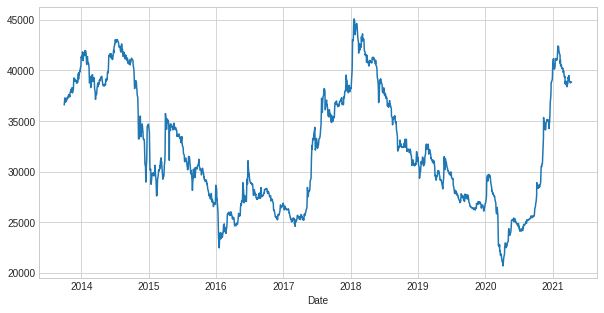

In [ ]:
nigeria = pd.read_csv("/content/drive/MyDrive/MScFE Capstone/Indices Data - Daily/NSENG_DLY_ASI, 1D.csv")
nigeria['Date'] = nigeria['time']
nigeria['Close'] = nigeria['close']
nigeria = process_data(nigeria)
#nigeria.index = pd.to_datetime(nigeria['Date']) 
print(nigeria.head())
nigeria['Close'].plot(figsize=(10,5))

                  Date    Close
Date                           
2020-12-23  2020-12-23  1893.10
2020-12-24  2020-12-24  1909.87
2020-12-29  2020-12-29  1909.87
2020-12-30  2020-12-30  1916.30
2020-12-31  2020-12-31  1941.59


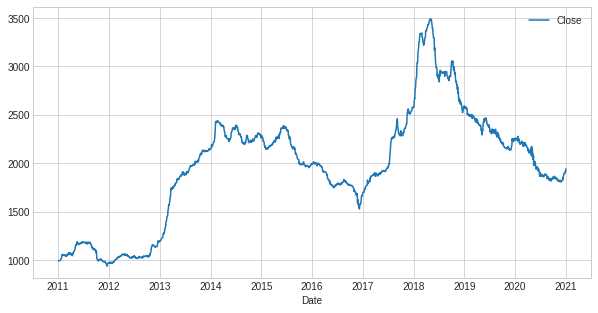

In [ ]:
ghana =  pd.read_csv("/content/drive/MyDrive/MScFE Capstone/Indices Data - Daily/All Share Index– Ghana Stock Exchange.xlsx - All Share Index(GSE-CI).csv")
#ghana.index = pd.to_datetime(ghana.Date)
ghana = process_data(ghana)
print(ghana.tail())

ghana = ghana.loc[datetime.date(year=2011, month=1,day=1):]
ghana =ghana[~ghana.index.duplicated(keep='first')]
ghana.plot(figsize=(10,5))

                            time      open  ...                  Date     Close
Date                                        ...                                
2011-07-14  2011-07-14T13:30:00Z  13383.39  ...  2011-07-14T13:30:00Z  13252.92
2011-07-15  2011-07-15T13:30:00Z  13300.83  ...  2011-07-15T13:30:00Z  13299.54
2011-07-18  2011-07-18T13:30:00Z  13289.59  ...  2011-07-18T13:30:00Z  13254.14
2011-07-19  2011-07-19T13:30:00Z  13284.50  ...  2011-07-19T13:30:00Z  13332.92
2011-07-20  2011-07-20T13:30:00Z  13348.84  ...  2011-07-20T13:30:00Z  13340.83

[5 rows x 12 columns]


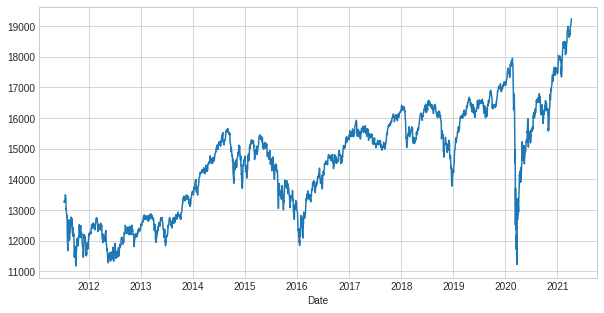

In [ ]:
canada = pd.read_csv("/content/drive/MyDrive/MScFE Capstone/Indices Data - Daily/TSX_DLY_TSX, 1D.csv")
canada['Date'] = canada['time']
canada['Close'] = canada['close']
canada = process_data(canada)
#canada.index = pd.to_datetime(canada.index) 
print(canada.head())
canada['Close'].plot(figsize=(10,5))

                            time       open  ...                  Date     Close
Date                                         ...                                
2010-04-30  2010-04-30T07:00:00Z  28784.400  ...  2010-04-30T07:00:00Z  28635.76
2010-05-03  2010-05-03T07:00:00Z  28485.789  ...  2010-05-03T07:00:00Z  28630.82
2010-05-04  2010-05-04T07:00:00Z  28615.730  ...  2010-05-04T07:00:00Z  27935.85
2010-05-05  2010-05-05T07:00:00Z  28045.289  ...  2010-05-05T07:00:00Z  27616.68
2010-05-06  2010-05-06T07:00:00Z  27243.039  ...  2010-05-06T07:00:00Z  27512.83

[5 rows x 12 columns]


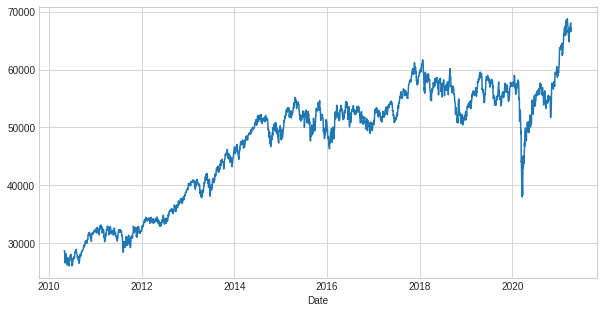

In [ ]:
south_africa = pd.read_csv("/content/drive/MyDrive/MScFE Capstone/Indices Data - Daily/JSE_DLY_J203, 1D.csv")

south_africa['Date'] = south_africa['time']
south_africa['Close'] = south_africa['close']
south_africa = process_data(south_africa)
#south_africa.index = pd.to_datetime(south_africa['Date']) 
print(south_africa.head())
south_africa['Close'].plot(figsize=(10,5))


In [ ]:
df = pd.DataFrame()

df['South_Africa'] = south_africa["Close"]
df['Ghana'] = ghana["Close"]
df['Nigeria'] = nigeria["Close"]
df['Canada'] = canada["Close"]

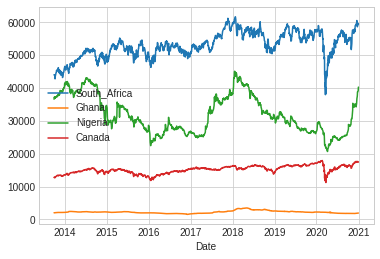

In [ ]:
df.dropna().plot()

In [ ]:
for col in df.columns:
  print(df[col].dropna().index[0],df[col].dropna().index[-1])

2010-04-30 2021-04-12
2011-01-04 2020-12-31
2013-09-30 2021-04-12
2011-07-14 2021-04-09


In [ ]:
df_log = np.log(df)
df_log.tail()

,South_Africa,Ghana,Nigeria,Canada
Date,,,,
2021-04-06,11.128202,NaN,10.565315,9.857660
2021-04-07,11.114839,NaN,10.565506,9.858964
2021-04-08,11.113253,NaN,10.568139,9.864168
2021-04-09,11.115299,NaN,10.567885,9.864124
2021-04-12,11.106917,NaN,10.567272,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8e6076690>,
      dtype=object)

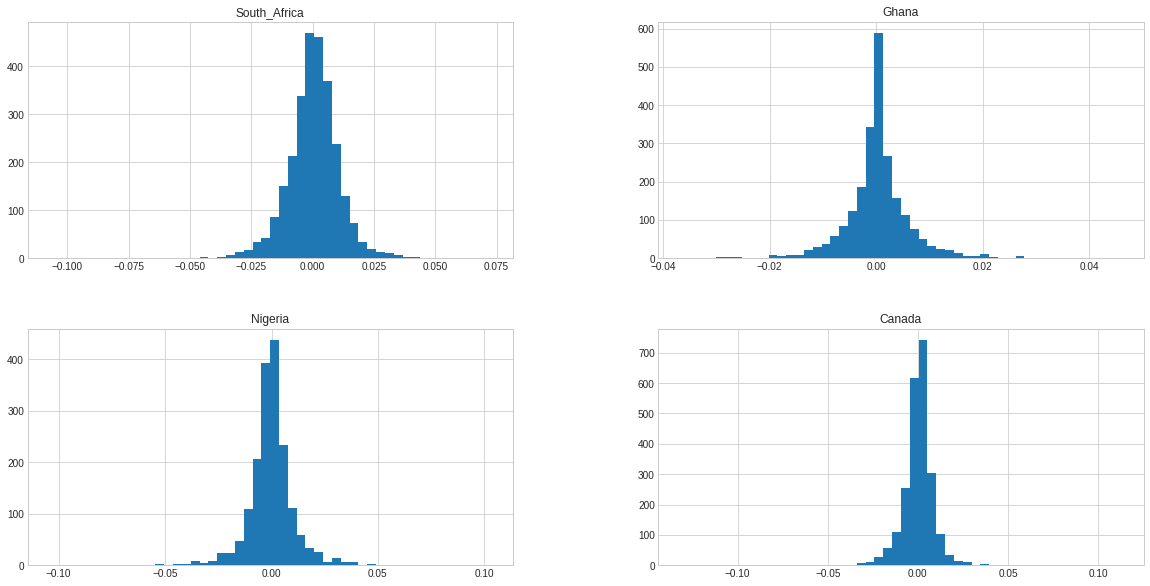

In [ ]:
(df_log - df_log.shift()).hist(bins=50, figsize=(20,10))


In [ ]:
print((df_log - df_log.shift()).kurtosis())

South_Africa     8.492922
Ghana            6.586180
Nigeria         12.349035
Canada          37.955697
dtype: float64


In [ ]:
(df_log - df_log.shift()).skew()

South_Africa   -0.688475
Ghana           0.176715
Nigeria         0.364460
Canada         -1.548406
dtype: float64

In [ ]:
(df_log - df_log.shift()).mean()

South_Africa    0.000309
Ghana           0.000270
Nigeria         0.000064
Canada          0.000116
dtype: float64

In [ ]:
(df_log - df_log.shift()).std()

South_Africa    0.010758
Ghana           0.006146
Nigeria         0.011168
Canada          0.009951
dtype: float64

In [ ]:
def make_adf_df(adf_test):
  adf = pd.DataFrame(adf_test).T
  adf.columns = ['test statistic', 'pvalue', 'used lags', 'number of observations','critical values', 'icbest']
  return adf

def make_pp_df(pp_test):
    pp_df = pd.DataFrame()
    for key, val in pp_test.items():
      pp_df = pp_df.append(pd.DataFrame({'test statistic': val.stat, 
                              'pvalue': val.pvalue, 
                              'used lags': val.lags, 
                              'number of observations': val.nobs, 
                              'critical values': [val.critical_values],}, index=[key]))
    return pp_df

def make_za_df(za_dict):
    za_df = pd.DataFrame(za_dict).T
    za_df.columns = ['test statistic', 'pvalue', 'critical values', 'used lags', 'structural break index']
    return za_df

In [ ]:
adf_test_const = {}
pp_test_const = {}
print("ADFuller Test and PP with Constant and No Trend", end='\n\n')
for country in df_log.columns:
  adf_test_const[country] = adfuller(df_log[country].dropna())
  #print(country,adf_test_const[country],end='\n\n')
  pp_test_const[country] = PhillipsPerron(df_log[country].dropna())
  #print(pp_test_const[country].summary().as_text())
  
display(make_adf_df(adf_test_const))
display(make_pp_df(pp_test_const))

ADFuller Test and PP with Constant and No Trend



,test statistic,pvalue,used lags,number of observations,critical values,icbest
South_Africa,-1.71296,0.42445,21,2713,"{'1%': -3.4327626421078423, '5%': -2.862605929...",-16951.7
Ghana,-1.80416,0.378397,10,2382,"{'1%': -3.4330982623925146, '5%': -2.862754141...",-17541.1
Nigeria,-1.6976,0.43235,2,1816,"{'1%': -3.4339560393603112, '5%': -2.863132865...",-11105.8
Canada,-1.23418,0.658722,21,2350,"{'1%': -3.4331357265371256, '5%': -2.862770684...",-15166.7


,test statistic,pvalue,used lags,number of observations,critical values
South_Africa,-1.469728,0.548430,28,2734,"{'1%': -3.432744093031768, '5%': -2.8625977373..."
Ghana,-1.958136,0.305225,27,2392,"{'1%': -3.4330867606360274, '5%': -2.862749062..."
Nigeria,-1.709114,0.426423,25,1818,"{'1%': -3.4339520666978056, '5%': -2.863131111..."
Canada,-1.337601,0.611799,27,2371,"{'1%': -3.433111026504876, '5%': -2.8627597776..."


In [ ]:
adf_test_trend = {}
pp_test_trend = dict(pp_test_const)
print("ADFuller and PP Test with Constant and Trend", end='\n\n')
for country in df.columns:
  adf_test_trend[country] = adfuller(df[country].dropna(), regression='ct')
  #print(country,adf_test_trend[country], )

  pp_test_trend[country].trend = "ct"
  #print(pp_test_trend[country].summary().as_text(),end='\n\n' )

display(make_adf_df(adf_test_trend))
display(make_pp_df(pp_test_trend))

ADFuller and PP Test with Constant and Trend



,test statistic,pvalue,used lags,number of observations,critical values,icbest
South_Africa,-2.69816,0.236846,21,2713,"{'1%': -3.9621108023088176, '5%': -3.412109512...",41323.3
Ghana,-1.40976,0.858024,10,2382,"{'1%': -3.9625756499382647, '5%': -3.412334752...",18602
Nigeria,-1.39656,0.861918,2,1816,"{'1%': -3.96376382977119, '5%': -3.41291036868...",26094
Canada,-3.54779,0.0345486,26,2345,"{'1%': -3.9626357770621072, '5%': -3.412363885...",29529.8


,test statistic,pvalue,used lags,number of observations,critical values
South_Africa,-2.528825,0.313704,28,2734,"{'1%': -3.9620851118871476, '5%': -3.412097063..."
Ghana,-0.913785,0.954656,27,2392,"{'1%': -3.962559719089563, '5%': -3.4123270340..."
Nigeria,-1.493445,0.831365,25,1818,"{'1%': -3.9637583264871843, '5%': -3.412907702..."
Canada,-4.031614,0.007925,27,2371,"{'1%': -3.9625933292879445, '5%': -3.412343318..."


In [ ]:
za_dict = {}
for country in df_log.columns:
    za_dict[country] = zivot_andrews(df_log[country].dropna(), regression='ct')
    #print(za_dict[country] )
za_df = make_za_df(za_dict)
za_df

,test statistic,pvalue,critical values,used lags,structural break index
South_Africa,-4.49741,0.213526,"{'1%': -5.57556, '5%': -5.07332, '10%': -4.82668}",21,787
Ghana,-3.2914,0.897669,"{'1%': -5.57556, '5%': -5.07332, '10%': -4.82668}",10,425
Nigeria,-2.5949,0.992455,"{'1%': -5.57556, '5%': -5.07332, '10%': -4.82668}",2,1523
Canada,-4.44742,0.236583,"{'1%': -5.57556, '5%': -5.07332, '10%': -4.82668}",26,947


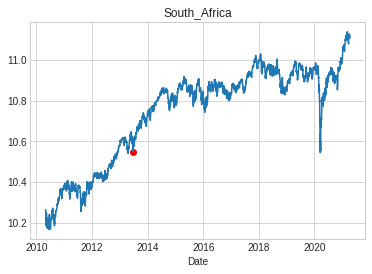

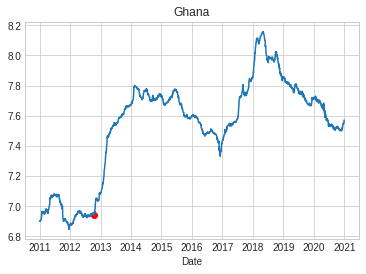

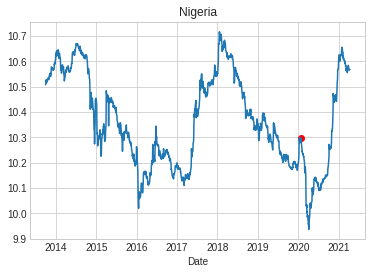

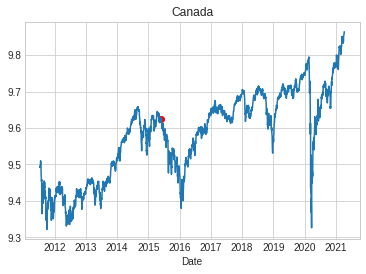

In [ ]:
for country in df_log:
  df_log[country].dropna().plot(title = country)
  plt.scatter(df_log[country].dropna().index[za_df.loc[country, 'structural break index']],
              df_log[country].dropna().iloc[za_df.loc[country, 'structural break index']],color='r')
  plt.show()

In [ ]:
df_log.to_csv('df_log.csv')

Conclusion: 
Canada is trend stationary (mean reverting) according to ADF

Next , we will use find and deploy mean reverting strategies for Canada (with trend).

In [1]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def bband_strategy(df, hl, plot_bnh=True):
    
    "Bollinger Band strategy backtester, plots(cumulative returns) and returns pnl of the stratey"

    bb = pd.DataFrame(index=df.index)
  
    z_score = (df - df.rolling(hl).mean()) /df.rolling(hl).std()
    entry = 2
    exit = 0

    bb['buy_signal'] = np.nan
    
    bb['buy_signal'][z_score < -entry] = 1
    bb['buy_signal'][z_score >= exit] = 0    
    
    bb['buy_signal'].iloc[0] = 0

    bb['buy_signal'] = bb['buy_signal'].fillna(method='ffill')

    bb['sell_signal'] = np.nan
    
    bb['sell_signal'][z_score > entry] = -1
    bb['sell_signal'][z_score <= exit] = 0    
    
    bb['sell_signal'].iloc[0] = 0

    bb['sell_signal'] = bb['sell_signal'].fillna(method='ffill')

    bb['signal'] = bb['buy_signal'] + bb['sell_signal']
    

    pnl = bb['signal'].dropna().shift() * (df.pct_change())
    (1+pnl).cumprod().plot(title=f'{df.name}: Mean Reversion Strategy vs Buy-and-Hold')
    if plot_bnh:
      (df.dropna()/df.dropna().iloc[0]).plot()
    return pnl


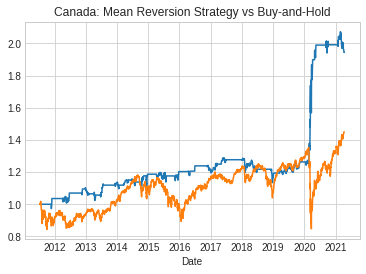

In [ ]:
canada_pnl = bband_strategy(df['Canada'], 20)

Next we conduct johansen test for cointegration for our time-series

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [ ]:
def get_johansen(y, p):
        """
        Get the cointegration vectors at 95% level of significance
        given by the trace statistic test.
        """

        N, l = y.shape
        jres = coint_johansen(y, 1, p)
        trstat = jres.trace_stat                      # trace statistic
        tsignf = jres.trace_stat_crit_vals            # critical values
        r=0
        for i in range(l):
            if trstat[i] > tsignf[i, 1]:     # 0: 90%  1:95% 2: 99%
                print(y.columns[i],trstat[i], tsignf[i, 1])
                r += 1
        jres.r = r
        #print(jres.evec)
        jres.evecr = jres.evec[:, :r]
        
        return jres

In [ ]:
joh_test = get_johansen(df.dropna(),1)
print(f'number of cointegrated series with 95% confidence is {joh_test.r}')

South_Africa 90.47889870996322 55.2459
Ghana 36.182785688094356 35.0116
Canada 6.088563400447505 3.8415
number of cointegrated series with 95% confidence is 3


In [ ]:
joh_test.trace_stat

array([90.47889871, 36.18278569, 16.68879201,  6.0885634 ])

In [ ]:
joh_test.trace_stat_crit_vals

array([[51.6492, 55.2459, 62.5202],
       [32.0645, 35.0116, 41.0815],
       [16.1619, 18.3985, 23.1485],
       [ 2.7055,  3.8415,  6.6349]])

In [ ]:
 lc = joh_test.evec[0]/joh_test.evec[0][0]
 lc

array([ 1.        , -0.65914846, -1.07195437,  0.02746963])

In [ ]:
coint_series = (df[['South_Africa', 'Ghana','Canada']].dropna() * lc[:3]).sum(axis=1)

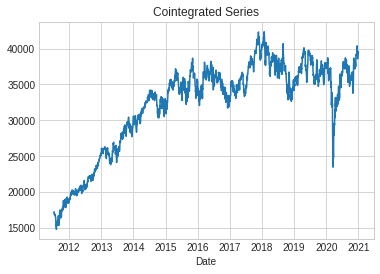

In [ ]:
coint_series.plot(title='Cointegrated Series')

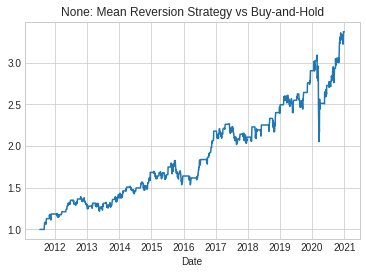

In [ ]:
coint_series_pnl = bband_strategy(coint_series, 20, False)

In [ ]:
!pip install pyfolio

     |████████████████████████████████| 92kB 3.5MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-cp37-none-any.whl size=88667 sha256=1a84bab7a3173032227e204e94ca1d575c8e4ae411a352db5288e7360c4fefa1
  Stored in directory: /root/.cache/pip/wheels/0d/a8/7d/ac33fe6bf6f3db370291c9de303460d00b8f97cc40a1d80f72
  Created wheel for empyrical: filename=empyrical-0.5.5-cp37-none-any.whl size=39764 sha256=70843f1df37648860636561a0dad7634c6dde478c0b8276909631a9940dcb13d
  Stored in directory: /root/.cache/pip/wheels/ea/b2/c8/6769d8444d2f2e608fae2641833110668d0ffd1abeb2e9f3fc
Successfully built pyfolio empyrical


In [ ]:
import pyfolio

In [ ]:
pyfolio.create_returns_tear_sheet(canada_pnl)

Start date,2010-04-30
End date,2021-04-12
Total months,130
,Backtest
Annual return,6.3%
Cumulative returns,94.4%
Annual volatility,11.6%
Sharpe ratio,0.65
Calmar ratio,0.53
Stability,0.62
Max drawdown,-11.9%


AttributeError: ignored

In [ ]:
pyfolio.create_returns_tear_sheet(coint_series_pnl)

Start date,2011-07-14
End date,2020-12-31
Total months,105
,Backtest
Annual return,14.8%
Cumulative returns,236.9%
Annual volatility,16.5%
Sharpe ratio,0.92
Calmar ratio,0.44
Stability,0.96
Max drawdown,-33.6%


AttributeError: ignored